Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

При попытке загрузить The Boston Housing выдаёт ошибку, скачал через оригинальный файл согласно рекомендациям.

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
Y = pd.DataFrame(target, columns=["price"])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

C:\Users\7777\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


До:	(404, 13)
После:	(404, 2)


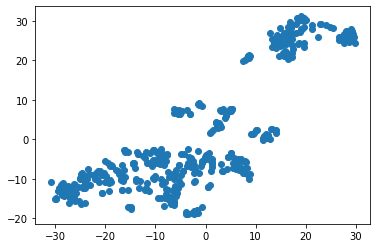

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

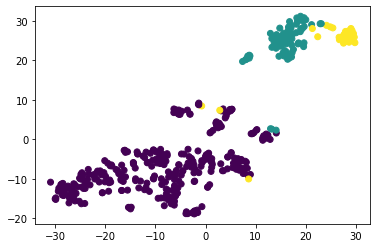

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,max_iter = 100, random_state=42)

train_labels = model.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [75]:
X_train['CLUSTERS'] = train_labels
y_train['CLUSTERS'] = train_labels
print(f"Среднее кол-во преступлений на душу населения для кластера № 1: {X_train['CRIM'].loc[X_train['CLUSTERS'] == 0].mean()}")
print(f"Средняя цена в кластере № 1: {y_train['price'].loc[y_train['CLUSTERS'] == 0].mean()}")
print(f"Среднее кол-во преступлений на душу населения для кластера № 2: {X_train['CRIM'].loc[X_train['CLUSTERS'] == 1].mean()}")
print(f"Средняя цена в кластере № 2: {y_train['price'].loc[y_train['CLUSTERS'] == 1].mean()}")
print(f"Среднее кол-во преступлений на душу населения для кластера № 3: {X_train['CRIM'].loc[X_train['CLUSTERS'] == 2].mean()}")
print(f"Средняя цена в кластере № 3: {y_train['price'].loc[y_train['CLUSTERS'] == 2].mean()}")

Среднее количество преступлений на душу населения для кластера № 1: 0.40486282828282844
Средняя цена в кластере № 1: 25.168686868686873
Среднее количество преступлений на душу населения для кластера № 2: 11.745661842105266
Средняя цена в кластере № 2: 17.4421052631579
Среднее количество преступлений на душу населения для кластера № 3: 14.360380322580648
Средняя цена в кластере № 3: 13.196774193548386


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [80]:
test_labels = model.fit_predict(X_test)
X_test['CLUSTERS'] = test_labels
y_test['CLUSTERS'] = test_labels
print(f"Для тестовой выборки среднее кол-во преступлений для кластера № 1: {X_test['CRIM'].loc[X_test['CLUSTERS'] == 0].mean()}")
print(f"Средняя цена в кластере № 1: {y_test['price'].loc[y_test['CLUSTERS'] == 0].mean()}")
print(f"Для тестовой выборки среднее кол-во преступлений на душу населения для кластера № 2: {X_test['CRIM'].loc[X_test['CLUSTERS'] == 1].mean()}")
print(f"Средняя цена в кластере № 2: {y_test['price'].loc[y_test['CLUSTERS'] == 1].mean()}")
print(f"Для тестовой выборки среднее кол-во преступлений на душу населения для кластера № 3: {X_test['CRIM'].loc[X_test['CLUSTERS'] == 2].mean()}")
print(f"Средняя цена в кластере № 3: {y_test['price'].loc[y_test['CLUSTERS'] == 2].mean()}")

Для тестовой выборки среднее кол-во преступлений для кластера № 1: 0.2464211594202899
Средняя цена в кластере № 1: 23.911594202898552
Для тестовой выборки среднее кол-во преступлений на душу населения для кластера № 2: 8.469301923076923
Средняя цена в кластере № 2: 17.39230769230769
Для тестовой выборки среднее кол-во преступлений на душу населения для кластера № 3: 19.021665714285714
Средняя цена в кластере № 3: 12.814285714285713
